# Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
import os

X_PATH = '/home/diyahir/Documents/Data'
# modify as needed for personal computer

# Exploratory Data Analysis

### Importing Data and resizing 

In [5]:
X_unsized = pd.read_csv(X_PATH + '/x.csv', header = None)
X_unsized.head()
X_unsized.shape
X = np.resize(X_unsized.values, (120,300))
sample = X[0]
sample.resize(10,10,3)
X_new = []
for instance in X:
    temp = instance
    temp = np.reshape(temp,(10,10,3),order ='F')
    X_new.append(temp)
    
#     print(temp[:,:,0])
#     plt.matshow(temp[:,:,0])
#     plt.colorbar()
#     plt.show()
#     sds

print('Size of dataset X: ', len(X_new))
print('Where each instance is of size: ',temp.shape)

Size of dataset X:  120
Where each instance is of size:  (10, 10, 3)


### Visualizing Dataset

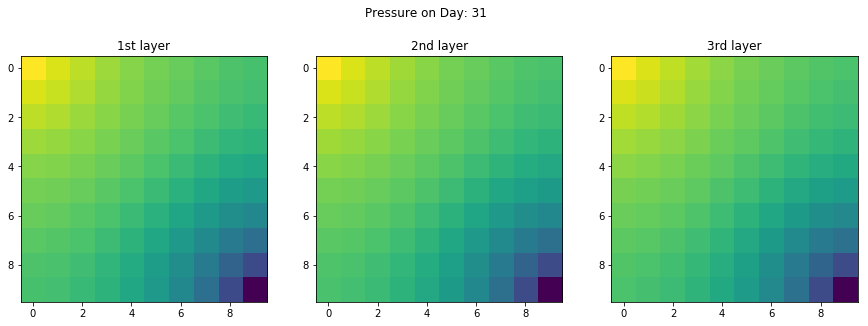

In [6]:
DAY = random.randint(0,119)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.imshow(X_new[DAY][:,:,0])
ax1.set_title('1st layer')
ax2.imshow(X_new[DAY][:,:,1])
ax2.set_title('2nd layer')
ax3.imshow(X_new[DAY][:,:,2])
ax3.set_title('3rd layer')
fig.suptitle('Pressure on Day: ' + str(DAY))
plt.show()

# Constructing Raw Dataset

In [37]:
def create_dataset(X,window_len):
    """
    Takes in a timeseries X to create a dataset such that
    
    X_new = [[X_0,X_1,X_2,...,X_window_len],....[X_end-window_len,....,X_end]]
    Y_new = [X_window_len,....X_end]
    """
    X_new = []
    Y_new = X[window_len:]
    for index in range(len(X) - window_len):
        temp = np.reshape(X[index],(10,10,3,1))
        for i in range(1,window_len):
            new_X = np.reshape(X[index+i],(10,10,3,1))
            temp = np.concatenate((temp,new_X),axis = 3)
        
        X_new.append(temp)
    X_new = np.stack(X_new) 
    Y_new = np.stack(Y_new)
    return X_new,Y_new

### Sanity Check

In [8]:
X, Y = create_dataset(X_new,3)
print('Shape of each x:',X[0].shape)
print('Size of X dataset:',X.shape)
print('Structure        : (number of instances, x-space, y-space, z-space, time)')
print('Size of Y dataset:',Y.shape)

Shape of each x: (10, 10, 3, 3)
Size of X dataset: (117, 10, 10, 3, 3)
Structure        : (number of instances, x-space, y-space, z-space, time)
Size of Y dataset: (117, 10, 10, 3)


In [9]:
print('Sanity check so that we know that the first Y is the next X')
print(X[1][:,:,0,2] == Y[0][:,:,0])

Sanity check so that we know that the first Y is the next X
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


Ploting the pressure at the top level on day 1


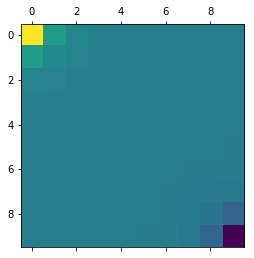

In [10]:
plt.matshow(X[0,:,:,0,0])
print('Ploting the pressure at the top level on day 1')
plt.show()

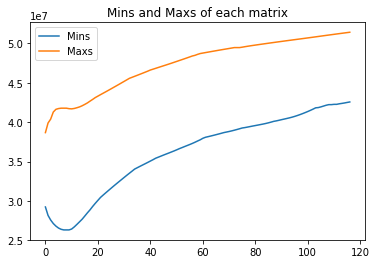

In [11]:
mins = np.min(np.min(np.min(np.min(X,axis = 1),axis = 1),axis = 1),axis = 1)
maxs = np.max(np.max(np.max(np.max(X,axis = 1),axis = 1),axis = 1),axis = 1)
plt.plot(mins)
plt.plot(maxs)
plt.title('Mins and Maxs of each matrix')
plt.legend(['Mins','Maxs'])
plt.show()

# Normalizing Dataset

In [12]:
def scaledata(X,Y):
    n = len(X) # number of data entries
    stds = np.zeros([n,])
    means = np.zeros([n,])
    for i in range(n):
        stds[i] = np.std(X[i,:,:,:,0])
        means[i] = np.mean(X[i,:,:,:,0])
        X[i,] = np.true_divide(X[i,]-means[i],stds[i])
        Y[i,] = np.true_divide(Y[i,]-means[i],stds[i])
    return X,Y,stds,means
    
def rescaledata(stds,means,Y):
    n = len(Y)
    for i in range(n):
        Y[i,] = stds[i]*Y[i,]+means[i]
    return Y

In [13]:
X_normalized, Y_normalized, stds,means = scaledata(X,Y)

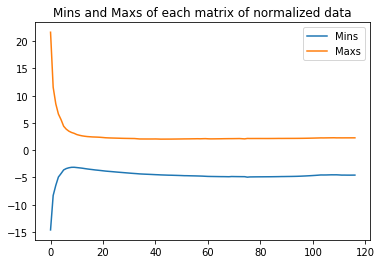

In [14]:
mins = np.min(np.min(np.min(np.min(X_normalized,axis = 1),axis = 1),axis = 1),axis = 1)
maxs = np.max(np.max(np.max(np.max(X_normalized,axis = 1),axis = 1),axis = 1),axis = 1)
plt.plot(mins)
plt.plot(maxs)
plt.title('Mins and Maxs of each matrix of normalized data')
plt.legend(['Mins','Maxs'])
plt.show()

## Creating Dataset with multiple simulations

In [30]:
X_RAND_PATH = '/home/diyahir/Documents/CAAM_495_Senior_Design/caam-495-fluid-flow/Data/xs/'

Collecting all the files

In [36]:
X_total = []
for filename in os.listdir(X_RAND_PATH):
    CUR_PATH = X_RAND_PATH+filename
    X_unsized = pd.read_csv(X_PATH + '/x.csv', header = None)
    X_unsized.head()
    X_unsized.shape
    X = np.resize(X_unsized.values, (120,300))
    sample = X[0]
    sample.resize(10,10,3)
    X_new = []
    for instance in X:
        temp = instance
        temp = np.reshape(temp,(10,10,3),order ='F')
        X_new.append(temp)
    
    X_total.append(X_new)
print('Size of dataset X: ', len(X_new))
print('Where each instance is of size: ',temp.shape)
print(len(X_total))

Size of dataset X:  120
Where each instance is of size:  (10, 10, 3)
40


Creating dataset

In [42]:
X_total_dataset = []
Y_total_dataset = []

for index in range(len(X_total)):
    X, Y = create_dataset(X_total[index],3)
    X_total_dataset.append(X)
    Y_total_dataset.append(Y)
print('Shape of each x:',X_total_dataset[0][0].shape)
print('Size of X dataset:',X_total_dataset[0].shape)
print('Structure        : (number of instances, x-space, y-space, z-space, time)')
print('Size of Y dataset:',Y_total_dataset[0].shape)

Shape of each x: (10, 10, 3, 3)
Size of X dataset: (117, 10, 10, 3, 3)
Structure        : (number of instances, x-space, y-space, z-space, time)
Size of Y dataset: (117, 10, 10, 3)


Scaling dataset

In [43]:
X_total_scaled = []
Y_total_scaled = []

for index in range(len(X_total_dataset)):
    X_normalized, Y_normalized, stds,means = scaledata(X_total_dataset[index],Y_total_dataset[index])
    X_total_scaled.append(X_normalized)
    Y_total_scaled.append(Y_normalized)
print(len(Y_total_scaled))

40


Stacking Dataset

In [48]:
X_stacked = X_total_scaled[0]
Y_stacked = Y_total_scaled[0]

for index in range(1,len(X_total_scaled)):
    X_stacked = np.vstack((X_stacked,X_total_scaled[index]))
    Y_stacked = np.vstack((Y_stacked,Y_total_scaled[index]))
print(X_stacked.shape)
print(Y_stacked.shape)

(4680, 10, 10, 3, 3)
(4680, 10, 10, 3)


### Spliting Data into TRAIN/TEST

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
 X_train, X_test, y_train, y_test = train_test_split(X_stacked, Y_stacked,
                                                     test_size =0.20,
                                                     random_state=42,
                                                    shuffle = True)
y_train = np.expand_dims(y_train,axis = 5)
y_test = np.expand_dims(y_test,axis = 5)

/home/diyahir/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
/home/diyahir/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


In [53]:
print('Training size X:',X_train.shape)
print('Testing size  X:',X_test.shape)
print('Training size Y:',y_train.shape)
print('Testing size  Y:',y_test.shape)



Training size X: (3744, 10, 10, 3, 3)
Testing size  X: (936, 10, 10, 3, 3)
Training size Y: (3744, 10, 10, 3, 1)
Testing size  Y: (936, 10, 10, 3, 1)


Ploting the pressure for first Training data


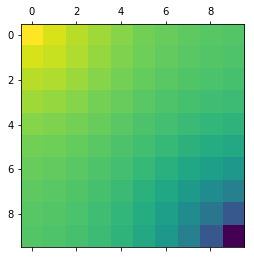

In [58]:
plt.matshow(X_train[0,:,:,0,0])
print('Ploting the pressure for first Training data')
plt.show()

# Creating Neural Network Architecture

In [59]:
import keras
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv3D, Conv3DTranspose

from keras.layers.pooling import MaxPooling3D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

X_SIZE = 10
Y_SIZE = 10 
SAT_LAYERS = 3
WINDOW_LENGTH = 3

Using TensorFlow backend.


In [60]:
inputs = Input((X_SIZE, Y_SIZE, SAT_LAYERS, WINDOW_LENGTH))

c1 = Conv3D(8, (3, 3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
c1 = Dropout(0.1) (c1)
c1 = Conv3D(16, (3, 3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling3D((2, 2, 1)) (c1)

u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same') (p1)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv3D(16, (3, 3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv3D(16, (3, 3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv3D(1, (1, 1, 7), activation='linear') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='mse')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 10, 3, 3) 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 10, 10, 3, 8) 656         input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 10, 10, 3, 8) 0           conv3d_1[0][0]                   
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 10, 10, 3, 16 3472        dropout_1[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [61]:
callbacks = [EarlyStopping(monitor='val_loss', patience=6),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [62]:
model.fit(X_train, y_train, epochs=40, batch_size= 30,callbacks=callbacks,
         validation_data=(X_test, y_test))

Train on 3744 samples, validate on 936 samples
Epoch 1/40
3744/3744 [==============================] - 89s 24ms/step - loss: 0.1525 - val_loss: 0.0144
Epoch 2/40
3744/3744 [==============================] - 86s 23ms/step - loss: 0.0304 - val_loss: 0.0077
Epoch 3/40
3744/3744 [==============================] - 82s 22ms/step - loss: 0.0190 - val_loss: 0.0045
Epoch 4/40
3744/3744 [==============================] - 85s 23ms/step - loss: 0.0152 - val_loss: 0.0041
Epoch 5/40
3744/3744 [==============================] - 87s 23ms/step - loss: 0.0116 - val_loss: 0.0024
Epoch 6/40
3744/3744 [==============================] - 95s 25ms/step - loss: 0.0101 - val_loss: 0.0036
Epoch 7/40
3744/3744 [==============================] - 108s 29ms/step - loss: 0.0091 - val_loss: 0.0026
Epoch 8/40
3744/3744 [==============================] - 84s 22ms/step - loss: 0.0083 - val_loss: 0.0019
Epoch 9/40
3744/3744 [==============================] - 90s 24ms/step - loss: 0.0073 - val_loss: 0.0026
Epoch 10/40
3744

KeyboardInterrupt: 

In [63]:
model.save_weights("UNet_model.h5")